<a href="https://colab.research.google.com/github/leen204/mining-project/blob/main/DATA%20MINING%20NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Goal


Goal: The goal of this project is to analyze the dataset, identify significant risk factors, and develop predictive models to assist in the early detection and understanding of Alzheimer’s Disease.


#Source


https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

#Dataset information


In order to efficiently retrive the dataset's information we need to import it as follows:


In [ ]:
import pandas as pd
df = pd.read_csv('alzheimers_disease_data.csv')

after that we can easily obtain the **Dataset Information:**

Class label: Diagnosis

In [ ]:
attribute_info = pd.DataFrame({
    'NameOfAttribute' : df.columns,
    'DataType' : df.dtypes.values
})

print(f"Number of attributes: {len(df.columns)}\n")
print(f"Number of Objects: {len(df)}\n")
print(f"Attirbutes along with their types: \n")
print(attribute_info)
print('\n')



Number of attributes: 35

Number of Objects: 2149

Attirbutes along with their types: 

              NameOfAttribute DataType
0                   PatientID    int64
1                         Age    int64
2                      Gender    int64
3                   Ethnicity    int64
4              EducationLevel    int64
5                         BMI  float64
6                     Smoking    int64
7          AlcoholConsumption  float64
8            PhysicalActivity  float64
9                 DietQuality  float64
10               SleepQuality  float64
11    FamilyHistoryAlzheimers    int64
12      CardiovascularDisease    int64
13                   Diabetes    int64
14                 Depression    int64
15                 HeadInjury    int64
16               Hypertension    int64
17                 SystolicBP    int64
18                DiastolicBP    int64
19           CholesterolTotal  float64
20             CholesterolLDL  float64
21             CholesterolHDL  float64
22   Cholestero

# sampling:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('alzheimers_disease_data.csv')
sample_size = 100  # sample size
strat_sample, _ = train_test_split(df, test_size=(1 - sample_size / len(df)), stratify=df["Diagnosis"], random_state=42)

#Display the class distribution in the sample to verify
print("Sample class distribution:\n", strat_sample["Diagnosis"].value_counts(normalize=True) * 100)


Sample class distribution:
 Diagnosis
0    65.0
1    35.0
Name: proportion, dtype: float64


# Show the Min., 1st Qu., Median, Mean ,3rd Qu.,Max., Mode. :

Using the summary_stats() function, we can derive key insights from the dataset. Based on these summary statistics, several important observations and mode values can be identified.

**Age**: The ages span from 60 to 90 years, with a median of 75 years and a mean of 74.91 years. The mode is 73 years, indicating a focus on elderly individuals.

**BMI**: BMI values range from 15.01 to 39.99, with a median of 27.82 and a mean of 27.65. The mode is 22.93, reflecting variability in weight, centered around the overweight category.

**SystolicBP**: Systolic blood pressure ranges from 90 to 179, with a median of 134 and a mean of 134.26. The mode is 142, indicating mostly normal to slightly elevated levels.

**DiastolicBP**: Diastolic blood pressure ranges from 60 to 119, with a median of 91 and a mean of 89.85. The mode is 72, showing moderate variability.

**Cholesterol** (Total, LDL, HDL): Total cholesterol (mean: 225.20, mode: 242.37), LDL (mean: 124.33, mode: 56.15), and HDL (mean: 59.46, mode: 33.68) indicate significant variability across individuals.

**Hypertension**: Hypertension is a binary variable, with a mode of 0, meaning most individuals do not have hypertension.

**Cardiovascular** Disease: The mode is 0, indicating most individuals do not have cardiovascular disease.

**Diabetes**: The mode is 1, showing some individuals have diabetes, but it is not widespread.

**Diagnosis**: The mode is 0, indicating most individuals have not been diagnosed positively.

In [ ]:
selected_columns = [
    "Age", "BMI", "SystolicBP", "DiastolicBP", "CholesterolTotal",
    "CholesterolLDL", "CholesterolHDL", "Hypertension","Gender",
    "CardiovascularDisease", "Diabetes", "Diagnosis"
]
summary_stats = df[selected_columns].describe()
print(summary_stats)



               Age          BMI   SystolicBP  DiastolicBP  CholesterolTotal  \
count  2149.000000  2149.000000  2149.000000  2149.000000       2149.000000   
mean     74.908795    27.655697   134.264774    89.847836        225.197519   
std       8.990221     7.217438    25.949352    17.592496         42.542233   
min      60.000000    15.008851    90.000000    60.000000        150.093316   
25%      67.000000    21.611408   112.000000    74.000000        190.252963   
50%      75.000000    27.823924   134.000000    91.000000        225.086430   
75%      83.000000    33.869778   157.000000   105.000000        262.031657   
max      90.000000    39.992767   179.000000   119.000000        299.993353   

       CholesterolLDL  CholesterolHDL  Hypertension       Gender  \
count     2149.000000     2149.000000   2149.000000  2149.000000   
mean       124.335944       59.463533      0.148906     0.506282   
std         43.366584       23.139174      0.356079     0.500077   
min         50.2

In [ ]:
mode_values = df[selected_columns].iloc[0]
print(mode_values)

Age                       73.000000
BMI                       22.927749
SystolicBP               142.000000
DiastolicBP               72.000000
CholesterolTotal         242.366840
CholesterolLDL            56.150897
CholesterolHDL            33.682564
Hypertension               0.000000
Gender                     0.000000
CardiovascularDisease      0.000000
Diabetes                   1.000000
Diagnosis                  0.000000
Name: 0, dtype: float64



# Show the Variance:

Variance measures how spread out values are. A higher variance means more dispersion, while a lower variance means values are closer to the mean. Therefore, our variance results indicate:

**SystolicBP, CholesterolTotal, and CholesterolLDL:**
These columns have a high variance with values (673.37, 1809.84, 1880.66) respectively. This indicates a significant level of dispersion, reflecting a wide spread in blood pressure and cholesterol levels.

**Age , BMI, DiastolicBP, CholesterolHDL, and Gender:**  These columns exhibit a moderate level of variance with values (80.82, 52.09, 309.50, 535.42, and 0.25) respectively. This suggests a noticeable spread in age, BMI, and blood pressure, but not as extreme as the previous group. The variance in Gender (0.25) indicates a nearly equal distribution of males and females, ensuring a fair representation in gender-based analysis

**Hypertension, CardiovascularDisease, Diabetes, and Diagnosis:**
These columns have low variance with values (0.13, 0.12, 0.13, and 0.23) respectively. This indicates that most  individuals have similar values in these categories, reflecting limited variability in the dataset.

In [ ]:
variance=df[selected_columns].var(numeric_only=True)
print(variance)

Age                        80.824080
BMI                        52.091413
SystolicBP                673.368875
DiastolicBP               309.495923
CholesterolTotal         1809.841576
CholesterolLDL           1880.660612
CholesterolHDL            535.421368
Hypertension                0.126792
Gender                      0.250077
CardiovascularDisease       0.123502
Diabetes                    0.128096
Diagnosis                   0.228689
dtype: float64


# variable distibution class label

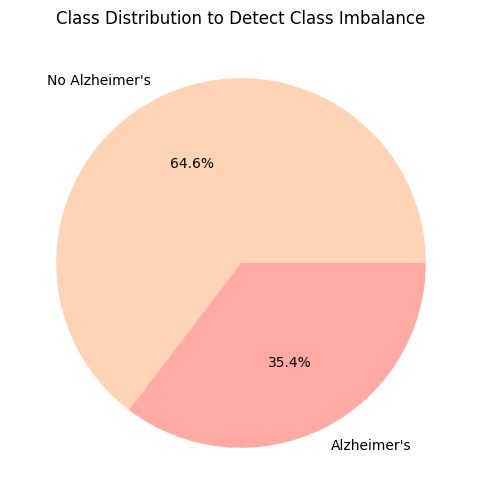

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('alzheimers_disease_data.csv')

diagnosis_labels = {0: "No Alzheimer's", 1: "Alzheimer's"}

df['Diagnosis'] = df['Diagnosis'].map(diagnosis_labels)
class_counts = df['Diagnosis'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%", colors =  ["#FFD3B5", "#FFAAA5"]
 )
plt.title('Class Distribution to Detect Class Imbalance')
plt.show()

# missing values

In [12]:
import pandas as pd
df = pd.read_csv('alzheimers_disease_data.csv')
missing_values = df.isna()

missing_counts = missing_values.sum();

rows_with_missing = df[df.isna().any(axis=1)];

print("Missing values in each column:");
print(missing_counts);
print("\nRows with missing values:");
print(rows_with_missing);

Missing values in each column:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
Difficul

# Variable distribution of smoking

<ipython-input-17-ca3b197f2777>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x=df['Smoking'], hue=df['Diagnosis'], palette="pastel")
<ipython-input-17-ca3b197f2777>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diagnosis")


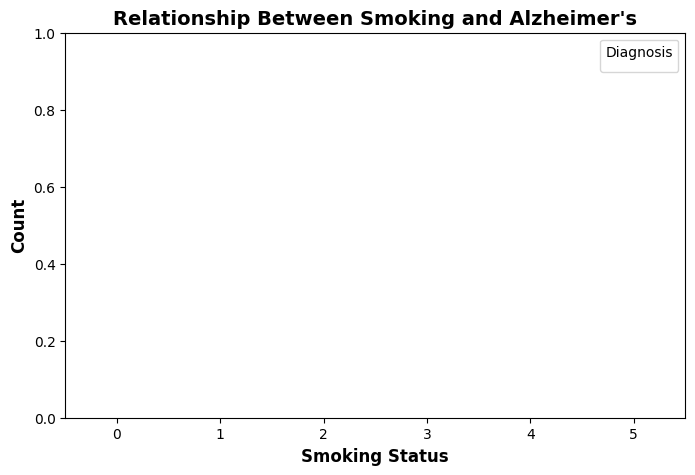

In [17]:
import seaborn as sns
smoking_labels = {0: "Non-Smoker", 1: "Smoker"}
diagnosis_labels = {0: "No Alzheimer's", 1: "Alzheimer's"}

df['Smoking'] = df['Smoking'].map(smoking_labels)
df['Diagnosis'] = df['Diagnosis'].map(diagnosis_labels)

plt.figure(figsize=(8,5))
sns.countplot(x=df['Smoking'], hue=df['Diagnosis'], palette="pastel")

plt.xlabel("Smoking Status", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.title("Relationship Between Smoking and Alzheimer's", fontsize=14, fontweight='bold')
plt.legend(title="Diagnosis")

plt.show()

# Data Preprocessing:

1. Variable Transformation:

Discretization:
We have noticed that the age column values go from 60 To 90 so we decided to devide these values to fit into the following 5 intervals (ensuring an equal difference between all intervals) : (60-66) (67-72) (73-78) (79-84) (85-90)



